In [ ]:
#https://www.kaggle.com/c/cassava-leaf-disease-classification/data
#5acab72028e81c5fbbddde9eb6202108

!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/gauravduttakiit/cassava-leaf-disease-classification", force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: flourisholaiya
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/gauravduttakiit/cassava-leaf-disease-classification


100%|██████████| 2.39G/2.39G [01:00<00:00, 42.0MB/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
# Define image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3
)

# Load training data
train_data = train_datagen.flow_from_directory(
    '/content/cassava-leaf-disease-classification/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Load validation data
val_data = train_datagen.flow_from_directory(
    '/content/cassava-leaf-disease-classification/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 11984 images belonging to 5 classes.
Found 1282 images belonging to 5 classes.


In [ ]:

from tensorflow.keras.applications import EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
#base_model = tf.keras.applications.ResNet50(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
#base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model layers

# Add classification layers
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    #tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dropout(0.3),
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5, activation='softmax')  # Adjust output neurons to match the number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
history = model.fit(train_data, validation_data=val_data, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1280s 3s/step - accuracy: 0.6098 - loss: 1.2607 - val_accuracy: 0.6154 - val_loss: 1.1835
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1278s 3s/step - accuracy: 0.6169 - loss: 1.2038 - val_accuracy: 0.6154 - val_loss: 1.1845
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1267s 3s/step - accuracy: 0.6099 - loss: 1.2101 - val_accuracy: 0.6154 - val_loss: 1.1898
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1263s 3s/step - accuracy: 0.6162 - loss: 1.1909 - val_accuracy: 0.6154 - val_loss: 1.1824
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1234s 3s/step - accuracy: 0.6227 - loss: 1.1793 - val_accuracy: 0.6154 - val_loss: 1.1825
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1258s 3s/step - accuracy: 0.6150 - loss: 1.1855 - val_accuracy: 0.6154 - val_loss: 1.1825
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1231s 3s/step - accuracy: 0.6131 - loss: 1.1889 - val_accuracy: 0.6154 - val_loss: 1.1823
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1231s 3s/step - accuracy: 0.6093 - loss: 1.1979 - 

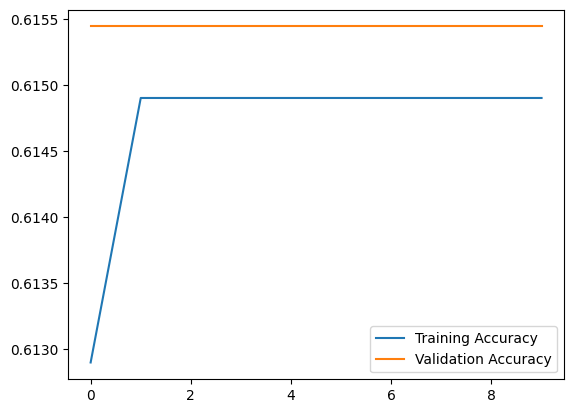

In [7]:
### **Step 6: Evaluate the Model**
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

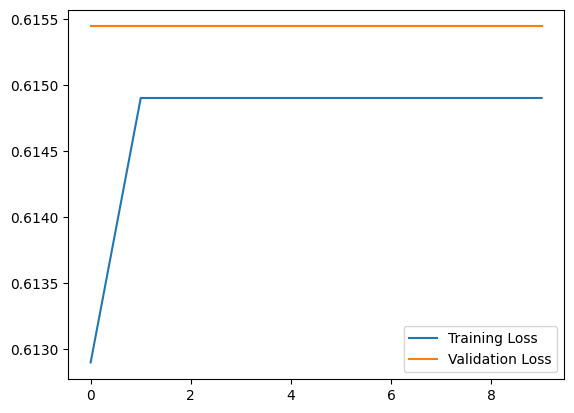

In [8]:
### **Step 6: Evaluate the Model**
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(acc, label='Training Loss')
plt.plot(val_acc, label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
model.save('cassava_leaf_disease_model.keras')

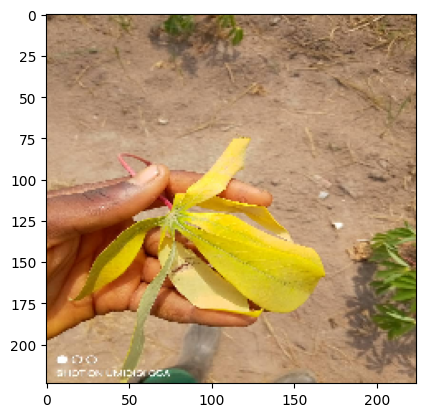

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Prediction: Cassava Mosaic Disease (CMD)


In [12]:

from tensorflow.keras.preprocessing import image

img_path = "/content/IMG-20250205-WA0016(1).jpg"
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
img_array = img_array / 255
plt.imshow(img_array[0])
plt.show()

prediction = model.predict(img_array)

predicted_class_index = tf.math.argmax(prediction[0]).numpy()
class_labels = list(train_data.class_indices.keys())
predicted_class = class_labels[predicted_class_index]

print(f"Prediction: {predicted_class}")

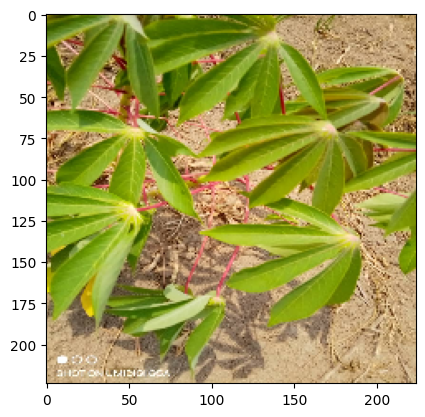

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Prediction: Cassava Mosaic Disease (CMD)


In [13]:
img_path = "/content/IMG-20250205-WA0015(1).jpg"
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
img_array = img_array / 255
plt.imshow(img_array[0])
plt.show()

prediction = model.predict(img_array)

predicted_class_index = tf.math.argmax(prediction[0]).numpy()
class_labels = list(train_data.class_indices.keys())
predicted_class = class_labels[predicted_class_index]

print(f"Prediction: {predicted_class}")

In [14]:
!pip install huggingface-hub

In [15]:
from huggingface_hub import login

# Log in to your Hugging Face account
login()

# Save the model
model.save_pretrained('cassava-CNN-model')

# Push to Hub
model.push_to_hub('cassava-CNN-classifier')

AttributeError: 'Sequential' object has no attribute 'save_pretrained'